# Traitement d'images avec python

In [1]:
import matplotlib.image as im
import matplotlib.pyplot as plt
import numpy as np

#Question 1
def lire_image(nom_fichier):
    I=im.imread(nom_fichier)   
    return I

In [2]:
#Question 2
I=lire_image('sonic.png')
print(type(I))
print(I.dtype)
print(I.ndim)

<class 'numpy.ndarray'>
float32
3


In [3]:
#Question 3
def afficher_image(I):    
    plt.imshow(I,'gray')
    plt.show()

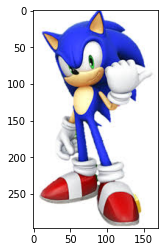

In [4]:
afficher_image(I)

In [5]:
#Question 4
def composante_bleue_version1(I):
    B=np.zeros(I.shape)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            B[i,j,2]=I[i,j,2]
    return B

def composante_bleue_version2(I):
    B=np.zeros(I.shape)
    B[:,:,2]=I[:,:,2]
    return B

def composante_vert(I):
    B=np.zeros(I.shape)
    B[:,:,1]=I[:,:,1]
    return B
def composante_rouge(I):
    B=np.zeros(I.shape)
    B[:,:,0]=I[:,:,0]
    return B

In [6]:
#Question 5
#ici on peut ajouter les etiquettes des images comme parametres de la fonction
def afficher_images(A,B,C,D):

    plt.subplot(2,2,1)
    plt.xlabel('image originale')
    plt.imshow(A)
    
    plt.subplot(2,2,2)
    plt.xlabel('composante bleue')
    plt.imshow(B)
    
    plt.subplot(2,2,3)
    plt.xlabel('composante verte')
    plt.imshow(C)
    
    plt.subplot(2,2,4)
    plt.xlabel('composante rouge')
    plt.imshow(D)
    
    plt.show()

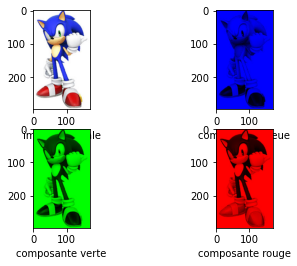

In [7]:
B=composante_bleue_version1(I)
V=composante_vert(I)
R=composante_rouge(I)
afficher_images(I,B,V,R)

In [8]:
#Question 6

def RGB2Gray_version1(I):    
    l,c=I.shape[0],I.shape[1]
    G=np.zeros((l,c))
    for i in range (l):
        for j in range (c):
            s=0
            for k in range(3):
                s=s+I[i,j,k]
            G[i,j]=s/3
    return G


def RGB2Gray_version2(I):    
    l,c=I.shape[0],I.shape[1]
    G=np.zeros((l,c))
    for i in range (l):
        for j in range (c):
            G[i,j]=sum(I[i,j,k] for k in range(3))/3
    return G

    
def RGB2Gray_version3(I):    
    l,c=I.shape[0],I.shape[1]
    G=np.zeros((l,c))
    for i in range (l):
        for j in range (c):
            G[i,j]=sum(I[i,j,:])/3
    return G

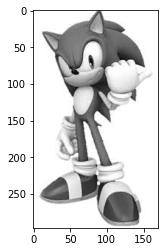

(297, 170) float64


In [9]:
#test de la fonction qui cree l'image en niveaux de gris
II=RGB2Gray_version1(I)
afficher_image(II)
print(II.shape,II.dtype)

In [10]:
#Partie 2
#Question 1
def negatif(I):
    f=lambda x: 1-x
    N=np.zeros(I.shape)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            N[i,j]=f(I[i,j])
    return N

def negatif_version2(I):
    f=lambda x: 1-x
    return (f(I))

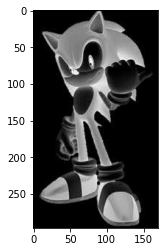

In [11]:
#test de la fonction "negatif" 
N=negatif(II)
afficher_image(N)

In [12]:
#Question 2

def miroir_H(I): 
    l=I.shape[0]    
    H=np.zeros(I.shape)    
    for i in range(l):
        H[i]=I[l-i-1]    
    return H

def miroir_H_version2(I):
    return I[::-1]

def miroir_V(I):        
    c=I.shape[1]
    V=np.zeros(I.shape)     
    for i in range(c):
        V[:,i]=I[:,c-i-1]   
    return V

def miroir_V_version2(I):
    return I[:,::-1]

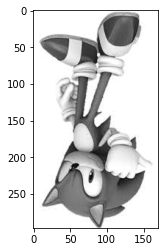

In [13]:
#test des fonctions de symmertie horizontale
M1=miroir_H_version2(II)
afficher_image(M1)

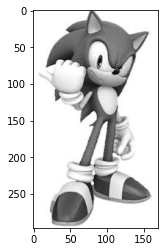

In [14]:
#test des fonctions de symmertie verticale
M2=miroir_V_version2(II)
afficher_image(M2)

In [15]:
#Question 3
def Contraste(I,f):
    return f(I)

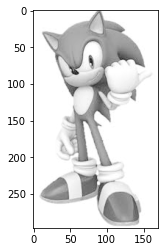

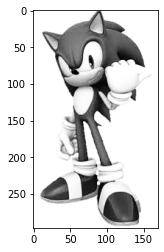

In [16]:
#Application des fonctions de contraste
f=lambda x:np.sqrt(x)
g=lambda x:0.5+0.5*np.sin(np.pi*(x-0.5))
Con1=Contraste(II,f)
Con2=Contraste(II,g)
afficher_image(Con1)
afficher_image(Con2)

In [17]:
#Question 4
def Convolution_pix(Filtre,I,x,y):
    return((Filtre*I[x-1:x+2,y-1:y+2]).sum()/9)
      
def convolution(I,Filtre):
    l=I.shape[0]
    c=I.shape[1]
    A=np.zeros(I.shape)
    for x in range(1,l-1):
        for y in range(1,c-1):
            A[x,y]= Convolution_pix(Filtre,I,x,y)
                       
    return A

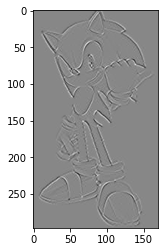

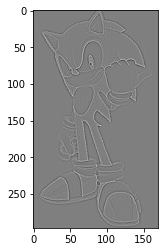

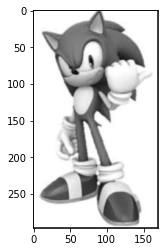

In [18]:
#Convolution 
F1 = [[1,0,-1],[0,0,0],[-1,0,1]]
F2 =[[0,1,0],[1,-4,1],[0,1,0]]
F3 = [[0,1,0],[1,1,1],[0,1,0]]

imF1=convolution(II,F1)
imF2=convolution(II,F2)
imF3=convolution(II,F3)

afficher_image(imF1)
afficher_image(imF2)
afficher_image(imF3)